Mean: 22.704166666666666
Standard Deviation: 5.780128118009674


Text(0, 0.5, 'Rainfall in millimetres')

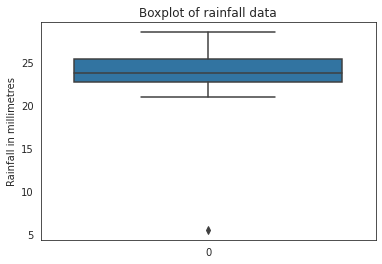

In [43]:
# Necessary libraries for assignment are pre-imported here.
import statistics as stats, seaborn as sns, scipy as scp, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# One can describe a standard normal distribution with mean and std dev.
data = (20.95, 22.41, 25.21, 25.78, 28.43, 22.67,
        24.55, 5.49, 23.11, 26.42, 23.90, 23.53)
print(f'Mean: {stats.mean(data)}')
print(f'Standard Deviation: {stats.stdev(data)}')

# Plot a boxplot to show the overall quartile range of the data.
plot = sns.boxplot(data=data)
plot.set_title("Boxplot of rainfall data")
plot.set_ylabel("Rainfall in millimetres")
# Result:
# It is evident that an outlier is present beyond and below the boxplot quartile range at around the 5 value mark indicated by the diamond shape crest.

[0.31697694 0.05315575 0.45280269 0.55580137 1.0346549  0.0061739
 0.33354106 3.11059034 0.07333386 0.67144902 0.21608642 0.14922762]
(array([7]),)
[20.95 22.41 25.21 25.78 28.43 22.67 24.55 23.11 26.42 23.9  23.53]
Mean: 24.26909090909091
Standard Deviation: 2.103385150396639


Text(0, 0.5, 'Rainfall in millimetres')

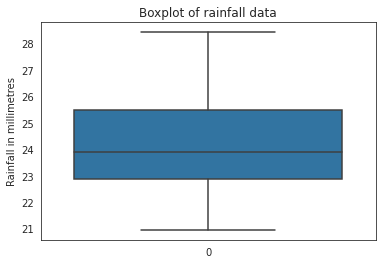

In [44]:
# Calculate the z-scores for each of the data points in order to further to get a general deviation from the mean.
z = np.abs(scp.stats.zscore(data))
print(z)

# Consider any data point outside of 3 STDDEV to be an outlier.
# The Empirical rule of standard normal distribution tells us that 99.7% of values are within 3 STD DEV away from the mean. 
# In that regard anything outside of 3 STDDEV should be considered outlier data points.
print(np.where(z > 3))
df = np.array(data)

# The new dataframe will be the old dataframe but with only values that are less than 3 STDDEV
df2 = df[(z < 3)]
print(df2)

# The new mean and STDDEV after outlier removal.
print(f'Mean: {stats.mean(df2)}')
print(f'Standard Deviation: {stats.stdev(df2)}')
# Note that the STDDEV is less than 3.

# Plot boxplot to see range of data again.
plot = sns.boxplot(data=df2)
plot.set_title("Boxplot of rainfall data")
plot.set_ylabel("Rainfall in millimetres")
# plot now has no outliers seen beyond either whisker of boxplot.

[1 1 1 ... 1 1 1]


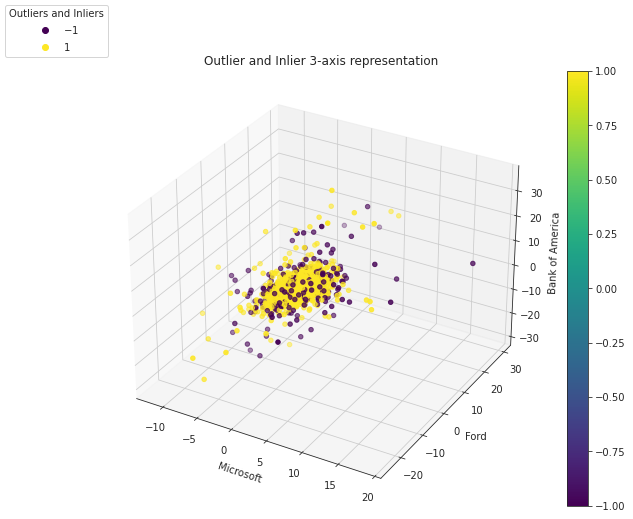

In [45]:
# Reload the stock dataset as in sections 1 and 2
stocks = pd.read_csv('datasets/stocks.csv', header='infer')
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'], axis=1)

# Where N is the amount of columns and d the amount of rows
N, d = stocks.shape

# Delta will be as previously the % change in daily closing prices of each stock in the dataset.
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:, :].values-stocks.iloc[:N-1, :].values, stocks.iloc[:N-1, :].values),
                     columns=stocks.columns, index=stocks.iloc[1:].index)

# Data is the stock csv values.
data = stocks.values

# All columns row data and row data. Input and output elements.
X, y = data[:, :-1], data[:, -1]

# Init a binary SVM classifier with a max misclassification of 1% thus 1% support vectors.
ee = OneClassSVM(nu=0.01, gamma='auto')
# Perform fit on input data and returns labels for that input data.
yhat = ee.fit_predict(delta)

print(yhat)  # Prints labels: -1 for outliers and 1 for inliers.

# Plot 3D scatterplot of outlier scores with color coded outlier inlier values.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Outlier and Inlier 3-axis representation")
# Binary CMAP as the gradient is white to black
p = ax.scatter(delta.MSFT, delta.F, delta.BAC, c=yhat, cmap='viridis')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.legend(loc='upper left', *p.legend_elements(), title="Outliers and Inliers")
fig.colorbar(p)
plt.show()

No handles with labels found to put in legend.


Frequencies of estimated outliers and inliers:
Amount of outliers: 448
Amount of inliers: 2069


(array([ 448., 2069.]),
 array([-1.,  0.,  1.]),
 <BarContainer object of 2 artists>)

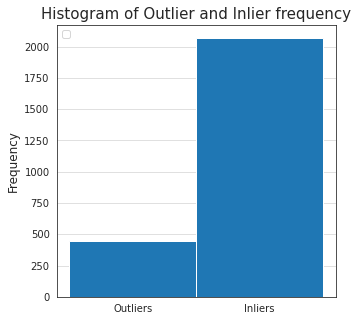

In [46]:
# Frequencies of the estimated outlier and inlier labels
print(f'Frequencies of estimated outliers and inliers:')
print(f'Amount of outliers: {np.count_nonzero(yhat == -1)}')
print(f'Amount of inliers: {np.count_nonzero(yhat == 1)}')

sns.set_style("white")

# Count all the outliers and inliers and init variables to hold the result.
outliers = np.count_nonzero(yhat == -1)
inliers = np.count_nonzero(yhat == 1)

plt.figure(figsize=(5,5))
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram of Outlier and Inlier frequency',fontsize=15)
# Dividing ticks by width centers them.
plt.xticks([-1/2, 1/2], ["Outliers", "Inliers"])

plt.legend()
plt.hist(x=yhat, bins=2)

In [47]:
# Differing approach and percentage of objects classified...
print(f'Percentage of objects that are outliers: {(outliers/len(yhat))*100}%\n as {outliers} / {len(yhat)} * 100  = {(outliers/len(yhat))*100}%')

Percentage of objects that are outliers: 17.798967024235203%
 as 448 / 2517 * 100  = 17.798967024235203%


In [48]:
# A large part where the SVM differs is that rather than a distance in proximity based methods we binary classify each data point in the dataset as a general outlier or inlier outright based on their z-score in a normal distribution from the mean.

# In comparison to parametric the assumption is made that the distribution of values is generally normal.

# Distance methods rely on centroid distance in relation to other data points and can be classified as multi-class while one class SVM is only applicable to a single yes or no detection principle.

In [49]:
# Github page indicates there is no missing values... Importing the dataset into pandas dataframe.
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv', header=None)

# Check missing values in each column. Why not.
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

# The output is the fourth column which is labelled as a Charles river dummy variable. 0 for all rows. can be kept. means house tract bounds river, the charles river. Proximity to river... No need to remove.

# Dataset values.
data = df.values
# Input elements and output elements X, y respectively.
X,y = data[:, :-1], data[:, -1]

print(X.shape, y.shape)
display(df)

Number of missing values:
	0: 0
	1: 0
	2: 0
	3: 0
	4: 0
	5: 0
	6: 0
	7: 0
	8: 0
	9: 0
	10: 0
	11: 0
	12: 0
	13: 0
(506, 13) (506,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [50]:
# I added these anyway as they are the actual attribute names from GitHub.
df.columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [51]:
# Importation of the StandardScaler module is needed to apply normalization throughout the dataframe.
from sklearn.preprocessing import StandardScaler

# Scaling the data such that the distribution of the data to a mean of zero and a standard deviation of one.
# this automates the z score for each feature be removing the mean. 
x = StandardScaler().fit_transform(data) # normalizing the features

# input output elements
X,y = data[:, :-1], data[:, -1]

In [52]:
# Checking wherever the standardscaler has scaled the data to have a mean of the standard normalized dataframe zero and standard deviation of 1.0 means its is standardized.
np.mean(x),np.std(x)

(-1.8255050523480835e-16, 1.0)

In [53]:
# Now we need to convert the properly normalized features into a tabular format.
feature_columns = ['feature_'+str(i) for i in range(x.shape[1])]
# My normalized dataframe will be the x dataframe with the feature columsn as labels.
normalised_df = pd.DataFrame(x,columns=feature_columns)

display(normalised_df)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [54]:
# Import the principal component library from sklearn.
from sklearn.decomposition import PCA
# The number of components suggested is 2 thus we define the two components as p_components.
p_components = PCA(n_components=2)
# Calling fit transform onto the x dataframe with p_components will collapse the dataframe onto a lower dimension.
principal_components_df = p_components.fit_transform(X)
# We need to put the principal components into a dataframe so we use a pandas dataframe and label the two columns as two separate principal components.
principal_Df = pd.DataFrame(data = principal_components_df
             , columns = ['principal component 1', 'principal component 2'])

# Check the dataset.
display(principal_Df)

,principal component 1,principal component 2
0,-119.818843,-5.560056
1,-168.890155,10.116209
2,-169.311707,14.080532
3,-190.230642,18.302463
4,-190.133451,16.097947
...,...,...
501,-138.697933,5.781485
502,-139.504439,1.039389
503,-138.387163,0.938092
504,-137.505173,4.251825


In [55]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

# Implement a k-nearest neighbour approach using k=2 neighbours
knn = 2
nbrs = NearestNeighbors(
    n_neighbors=knn, metric=distance.euclidean).fit(data)
distances, indices = nbrs.kneighbors(data)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:, knn-1]
print(outlier_score)

print(len(outlier_score))

[16.5628085  16.18433277 11.44014392  9.44926169  9.20643393  9.20643393
 15.15903726 13.06636346 12.64631233 11.29784518 11.44338056 11.29784518
 20.03804819  5.48446623  4.3816802   5.48446623 14.76634433  7.10533879
 51.79200977  8.23135411  8.27833335  6.38301684  4.34050985  7.00301402
  4.34050985  4.47084817  6.97411118  4.47084817  7.14785749  4.3816802
  4.60345727  8.27833335 22.87675363  4.60345727 22.87675363  8.10012356
  8.82837151  7.41040789 10.06153317  7.64655324  7.64655324  4.56551188
  4.56551188 10.27355829  9.97110144  4.03419174  4.03419174 16.18433277
 16.21286781 11.67671788 17.85059275 17.85059275  3.58269219  3.58269219
 67.31716533 19.12500847  8.80612754 22.27322073  9.02153245  6.87159045
  7.72937578 28.86582705  6.35825471  6.87159045 13.55546524 14.99926572
 14.99926572 11.6930401   6.72790721  6.72790721  6.67435846 11.67006846
  7.5177334   6.67435846 26.517642    4.10767662 23.21235015  4.10767662
  8.24808693 11.79730576  3.76238563  6.35825471  3.

Explained variation per principal component: [0.80582318 0.16305197]


<Figure size 432x288 with 0 Axes>

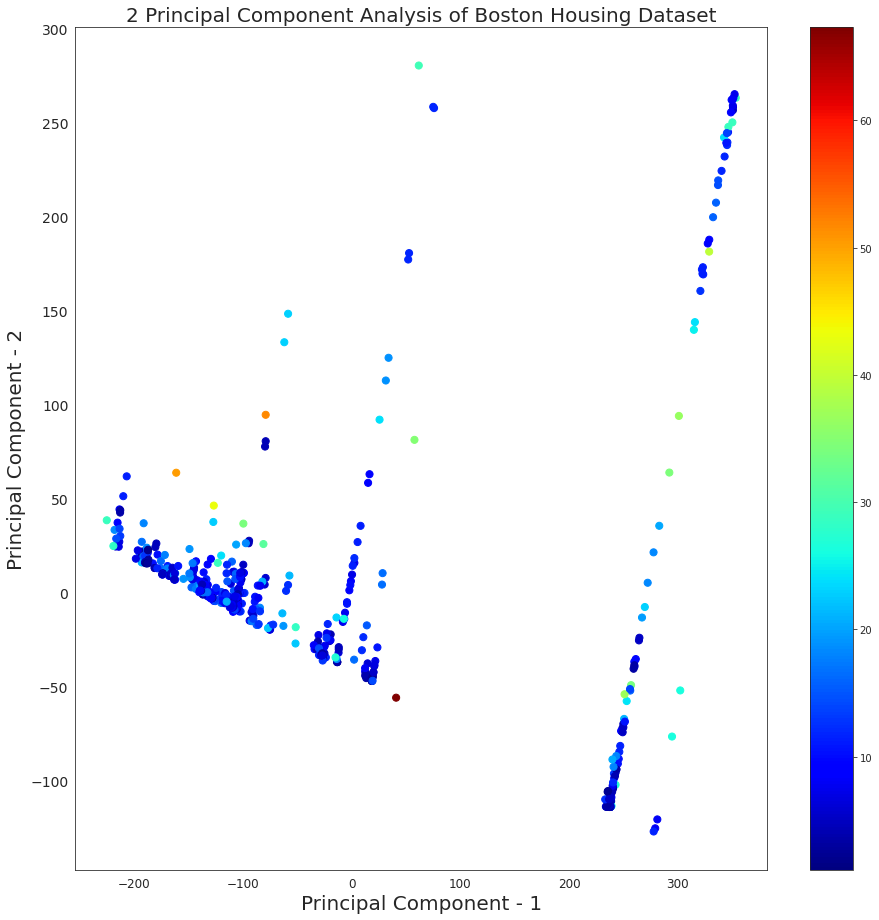

In [56]:
# Python library used for plotting will be matplotlib.
from matplotlib.pylab import plt
# Since we have the final principal components I can find out the ratio of components that they each hold.
print('Explained variation per principal component: {}'.format(p_components.explained_variance_ratio_))
# Create the base for a figure.
plt.figure()
# Our figures will be 15 by 15 inches.
plt.figure(figsize=(15.5,15.5))
# Font size for the markers on the x and y axis.
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
# Naming the axis' with specific names for each
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
# Plot title...
plt.title("2 Principal Component Analysis of Boston Housing Dataset",fontsize=20)
plt.scatter(principal_Df['principal component 1'],
            principal_Df['principal component 2'], c=outlier_score, cmap='jet', s=50)
plt.colorbar()
